# Predicting footballer player wage based on respective FIFA / EAFC plater stats

The problem we are addressing is correctly evaluating a playe's wage based on their stats. With ever more growing talent in the field, it is vital as a football club to accurately price your players to stay competitive. Our goal is to study & build machine learning models to accurately predict a footballer's wage based on a dataset of players wage and stats.

# Importing data

We are going to be utilising the [EA Sports FC 24 complete player dataset](https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022/) from kaggle for player stats and valautions.

Required Python modules:
* Pandas - importing and manipulating data

In [164]:
import pandas as pd
from copy import deepcopy
# instructing pandas to not truncate column widths when displaying data in interactive mode
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

random_state = 42 # Set random state to ensure all random variables can be reproduced
datasets_fp = 'datasets/' # Datasets file path
df = pd.read_csv(datasets_fp+'male_players.csv', encoding='unicode_escape')
df

C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\1082914646.py:9: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datasets_fp+'male_players.csv', encoding='unicode_escape')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. MbappÃ©,Kylian MbappÃ© Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical finisher, #Complete forward","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, #Clinical finisher, #Complete forward","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Crosser, #Complete midfielder","Pinged Pass +, Dead Ball, Incisive Pass, Long Ball Pass, Whipped Cross, Trivela",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acrobat, #Clinical finisher, #Complete midfielder, #Complete forward","Technical +, Finesse Shot, Dead Ball, Pinged Pass, Tiki Taka, Quick Step, Trivela",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,

Let's have a quick look at the dataframe

In [165]:
df.head(5) # first 5 rows

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. MbappÃ©,Kylian MbappÃ© Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical finisher, #Complete forward","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, #Clinical finisher, #Complete forward","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Crosser, #Complete midfielder","Pinged Pass +, Dead Ball, Incisive Pass, Long Ball Pass, Whipped Cross, Trivela",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acrobat, #Clinical finisher, #Complete midfielder, #Complete forward","Technical +, Finesse Shot, Dead Ball, Pinged Pass, Tiki Taka, Quick Step, Trivela",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,

Let's do a quick analysis of the data and it's columns using the pandas describe() method

In [166]:
df.describe(include='all') # using include='all' to show us all columns

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,180021.000000,180021,180021.000000,180021.0,180021,180021,180021,180021,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021,180021.000000,180021.000000,178156.000000,178156,178156.000000,178156,177771.000000,178156,178156.000000,10723,167433,178156.000000,180021.000000,180021,10098.000000,10098,10098.000000,180021,180021.000000,180021.000000,180021.000000,180021,180021,180021,1.207220e+05,13918,81805,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021
unique,NaN,180021,NaN,NaN,10,47272,52892,2031,NaN,NaN,NaN,NaN,NaN,9546,NaN,NaN,NaN,1082,NaN,42,NaN,29,NaN,831,4417,NaN,NaN,188,NaN,29,NaN,2,NaN,NaN,NaN,9,10,2,NaN,204,5208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401,401,401,340,310,310,310,340,441,441,441,422,390,390,390,422,399,429,429,429,399,393,475,475,475,393,297
top,NaN,/player/231747/kylian-mbappe/240002,NaN,NaN,2021-09-23,J. RodrÃ­guez,Danny Ward,CB,NaN,NaN,NaN,NaN,NaN,1992-02-29,NaN,NaN,NaN,Everton,NaN,Premier League,NaN,SUB,NaN,Atalanta,2017-07-01,NaN,NaN,England,NaN,SUB,NaN,Right,NaN,NaN,NaN,Medium/Medium,Normal (170-185),No,NaN,#Strength,Speed Dribbler (AI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60+2,60+2,60+2,64,62,62,62,64,62+2,62+2,62+2,62+2,60+2,60+2,60+2,62+2,60+2,61+2,61+2,61+2,60+2,62+2,63+2,63+2,63+2,62+2,16+2
freq,NaN,1,NaN,NaN,19239,90,20,22479,NaN,NaN,NaN,NaN,NaN,1065,NaN,NaN,NaN,444,NaN,9371,NaN,77123,NaN,145,4411,NaN,NaN,16415,NaN,5217,NaN,137660,NaN,NaN,NaN,98366,63022,163565,NaN,4714,4442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3510,3510,3510,7013,7055,7055,7055,701

Let's find out exactly how many columns we have

In [167]:
len(df.columns) # length of columns list

109

# Initial Data Preperation

Now we have sucessfully imported the dataset, we need to process the data to make it suitable to a machine learning model.

We will focusing on the Premier League data only so let's filter the dataset to satisfy this requirement

In [168]:
df = df[df['league_name'] == 'Premier League'] # filter league_name to 'Premier League'
df

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, #Clinical finisher, #Complete forward","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Crosser, #Complete midfielder","Pinged Pass +, Dead Ball, Incisive Pass, Long Ball Pass, Whipped Cross, Trivela",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
9,212831,/player/212831/alisson-ramses-becker/240002,24.0,2.0,2023-09-22,Alisson,Alisson RamsÃ©s Becker,GK,89,90,77500000.0,180000.0,30,1992-10-02,193,91,9.0,Liverpool,13.0,Premier League,1.0,GK,1.0,NaN,2018-07-19,2027.0,54,Brazil,NaN,NaN,NaN,Right,3,1,5,Medium/Medium,Unique,Yes,149200000.0,NaN,Far Throw,NaN,NaN,NaN,NaN,NaN,NaN,17,13,29,60,20,27,19,18,58,42,60,49,40,87,37,64,82,32,78,14,27,11,13,66,23,66.0,15,19,16,86,85,85,90,89,56.0,39+3,39+3,39+3,39,42,42,42,39,45+3,45+3,45+3,42+3,46+3,46+3,46+3,42+3,34+3,39+3,39+3,39+3,34+3,33+3,33+3,33+3,33+3,33+3,87+3
10,231866,/player/231866/rodrigo-hernandez-cascante/240002,24.0,2.0,2023-09-22,Rodri,Rodrigo HernÃ¡ndez Cascante,"CDM, CM",89,90,105500000.0,250000.0,27,1996-06-22,191,82,10.0,Manchester City,13.0,Premier League,1.0,RCM,16.0,NaN,2019-07-04,2027.0,45,Spain,1362.0,RCM,16.0,Right,4,3,4,Medium/High,Normal (185+),Yes,203100000.0,NaN,"Power Shot +, Long Ball Pass, Bruiser",58.0,73.0,80.0,80.0,85.0,84.0,63,64,81,89,59,79,65,61,90,88,54,62,65,89,64,91,80,89,83,82,83,84,75,82,62,85.0,88,87,78,10,10,7,14,8,NaN,77+3,77+3,77+3,76,79,79,79,76,80+3,80+3,80+3,78+3,85+3,85+3,85+3,78+3,80+3,87+3,87+3,87+3,80+3,80+3,84+3,84+3,84+3,80+3,19+3
11,239818,/player/239818/ruben

The current dataset has too many features with a large portion being irrelevant to the task at hand. We will drop the columns that aren't relevant using the .drop() function.

In [169]:
df.drop([
    'wage_eur',
    'player_url',
    'update_as_of',
    'short_name',
    'long_name',
    'dob',
    'club_name',
    'league_name',
    'club_position',
    'club_loaned_from',
    'club_joined_date',
    'nationality_id',
    'nation_position',
    'body_type',
    'real_face',
    'player_tags',
    'player_traits',
    'fifa_update',
    'league_level',
    'club_team_id',
    'league_id',
    'club_jersey_number',
    'club_contract_valid_until_year',
    'nation_team_id',
    'nation_jersey_number',
    'release_clause_eur',
    'height_cm',
    'weight_kg',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
    'gk',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve',
    'skill_fk_accuracy',
    'skill_long_passing',
    'skill_ball_control',
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance',
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots',
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure',
    'defending_marking_awareness',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'goalkeeping_diving',
    'goalkeeping_handling',
    'goalkeeping_kicking',
    'goalkeeping_positioning',
    'goalkeeping_reflexes',
    'goalkeeping_speed'
], axis=1, inplace=True)
df

C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\270882489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([


,player_id,fifa_version,player_positions,overall,potential,value_eur,age,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic
1,239085,24.0,ST,91,94,185000000.0,22,Norway,Left,3,3,5,High/Medium,89.0,93.0,66.0,80.0,45.0,88.0
2,192985,24.0,"CM, CAM",91,91,103000000.0,32,Belgium,Right,5,4,5,High/Medium,72.0,88.0,94.0,87.0,65.0,78.0
9,212831,24.0,GK,89,90,77500000.0,30,Brazil,Right,3,1,5,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN
10,231866,24.0,"CDM, CM",89,90,105500000.0,27,Spain,Right,4,3,4,Medium/High,58.0,73.0,80.0,80.0,85.0,84.0
11,239818,24.0,CB,89,90,106500000.0,26,Portugal,Right,4,2,4,Medium/High,62.0,39.0,66.0,69.0,89.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179683,225068,15.0,RW,50,55,30000.0,18,Republic of Ireland,Right,3,2,1,Medium/Medium,65.0,50.0,41.0,53.0,25.0,32.0
179693,222112,15.0,GK,50,54,30000.0,24,England,Left,3,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN
179720,201214,15.0,CF,49,61,30000.0,20,Russia,Right,3,2,1,Medium/Medium,66.0,51.0,34.0,52.0,29.0,46.0
179783,213693,15.0,CM,49,55,25000.0,19,England,Right,2,2,1,Medium/Medium,65.0,41.0,55.0,54.0,37.0,42.0


Need to extract main player position from player_positions column

In [170]:
#----------------------------------
# player_positions -> main_position
#----------------------------------

# list of all outfield positons can be found at https://www.fifplay.com/encyclopedia/position/
forward_positions = [
    'ST', 
    'CF',
    'RF',
    'LF',
    'RW',
    'LW',
]

midfielder_positions = [
    'CM',
    'CDM',
    'CAM',
    'RM',
    'LM',
]

defender_positions = [
    'CB',
    'RB',
    'LB',
    'RWB',
    'LWB',
]

def calc_main_position(positions: str):

    primary_position = positions.split(',')[0] # using first position mentioned as primary position

    if primary_position in forward_positions:
        return 'FW'
    elif primary_position in midfielder_positions:
        return 'MD'
    elif primary_position in defender_positions:
        return 'DF'
    elif primary_position == 'GK':
        return 'GK'
    else:
        return None # no valid position found

# Create new column with function applied to each value
df['main_position'] = df['player_positions'].apply(lambda pos: calc_main_position(pos))
# Show new column
print(df[['player_positions','main_position']])
# Check for nulls
print('\nNulls: ', df['main_position'].isnull().sum())
# Drop old column
df.drop(['player_positions'] ,axis=1,inplace=True)



       player_positions main_position
1                    ST            FW
2               CM, CAM            MD
9                    GK            GK
10              CDM, CM            MD
11                   CB            DF
...                 ...           ...
179683               RW            FW
179693               GK            GK
179720               CF            FW
179783               CM            MD
179819      CDM, CB, RB            MD

[9371 rows x 2 columns]

Nulls:  0


C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\972126675.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_position'] = df['player_positions'].apply(lambda pos: calc_main_position(pos))
C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\972126675.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['player_positions'] ,axis=1,inplace=True)


Filter data for non-goalkeeper players only

In [171]:
df = df[df['main_position'] != 'GK'] # filter out goalkeepers

# Splitting the dataset

In [172]:
# import train_test_split function from sklearn
# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Set target dataset to value_eur column
y = df['value_eur']
# Set features dataset to dataset minus value_eur column using .drop() function
X = df.drop(['value_eur'], axis=1)

# Create train, validation & test splits (80% / 20%)
X_train, X_valid_and_test, y_train, y_valid_and_test = train_test_split(
    X, y, test_size=.2, random_state=random_state
)
# Split remaining validation & test dataset to individual
# validation & test splits (50% / 50%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid_and_test, y_valid_and_test, test_size=.5, random_state=random_state
)


# Test if split was as expected by calculating percentage of each set
# This should give us a total split of 80%-10%-10% (train, valid, test)
train_percent = X_train.shape[0] / X.shape[0] * 100
valid_percent = X_valid.shape[0] / X.shape[0]  * 100
test_percent = X_test.shape[0] / X.shape[0]  * 100
total_percent = train_percent+test_percent+valid_percent

print(f'Train: {train_percent}%\
      \nValid: {valid_percent}%\
      \nTest: {test_percent}%\
      \n------------------------\
      \nTotal: {total_percent}%')


Train: 79.99281178866659%      
Valid: 10.003594105666707%      
Test: 10.003594105666707%      
------------------------      
Total: 100.0%


# EDA


In [173]:
# Install library for plots and visualisations
import seaborn as sns
import matplotlib as mpl

#### Univariate

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


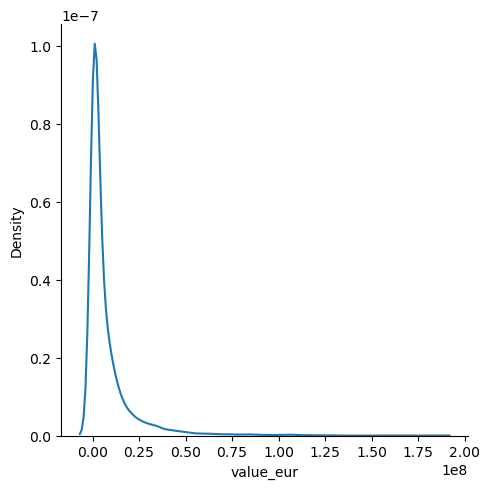

In [174]:
sns.displot(df['value_eur'],  kind='kde')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


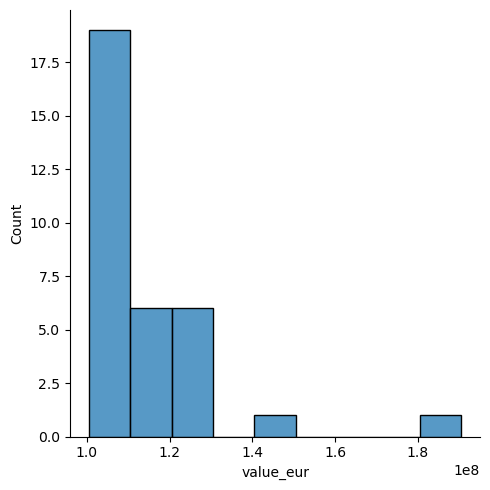

In [175]:
sns.displot(df[df['value_eur'] > 100000000]['value_eur'], binwidth=10000000)

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


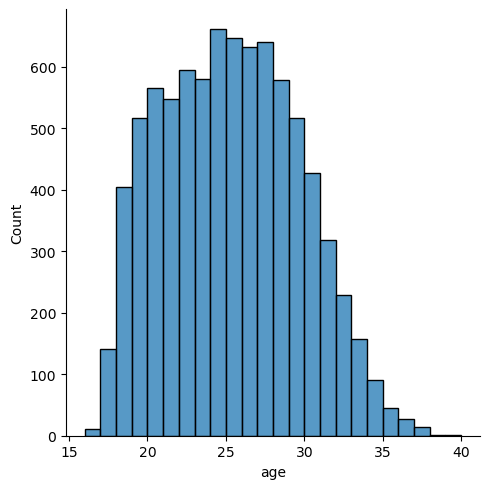

In [176]:
sns.displot(df['age'], binwidth=1) # binwidth = width of each bar

<Axes: xlabel='age'>

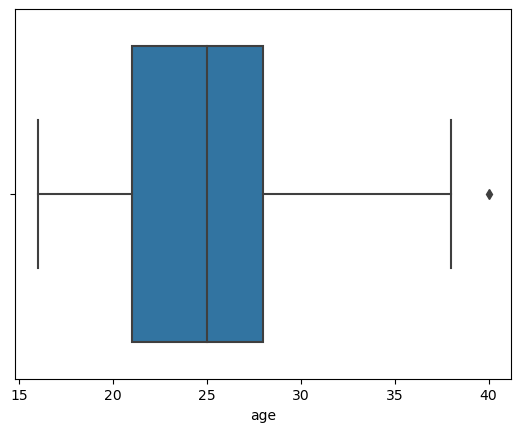

In [177]:
sns.boxplot(df, x='age', orient='h') # horizontal orientation

In [178]:
#sns.displot(df['overall'], binwidth=5)
#sns.boxplot(df['overall'], orient='h')

In [179]:
#sns.displot(df['potential'], binwidth=5)
#sns.boxplot(df['potential'], orient='h')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


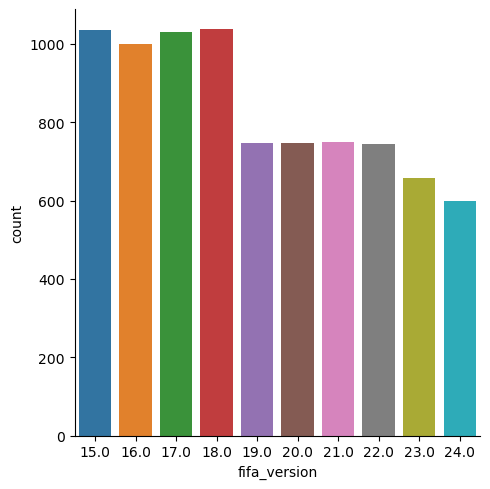

In [180]:
sns.catplot(df, x='fifa_version', kind='count')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


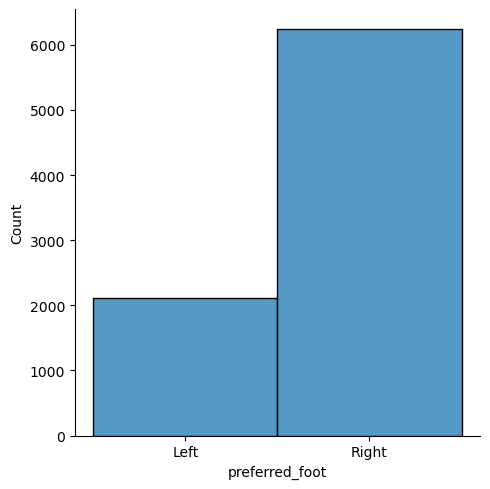

In [181]:
sns.displot(df['preferred_foot'])

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


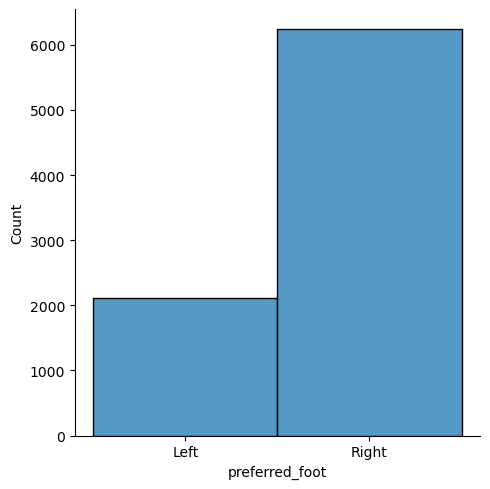

In [182]:
sns.displot(df['preferred_foot'])

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


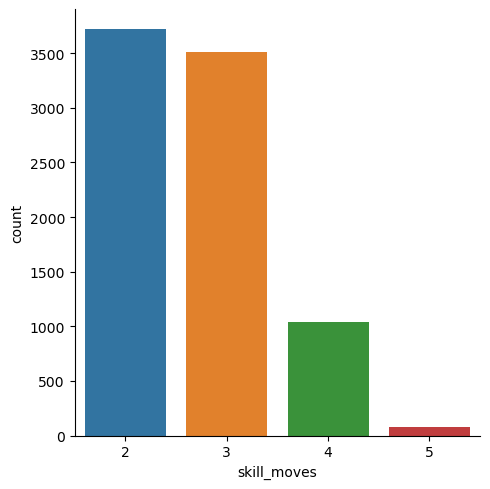

In [183]:
sns.catplot(df, x='skill_moves', kind='count')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


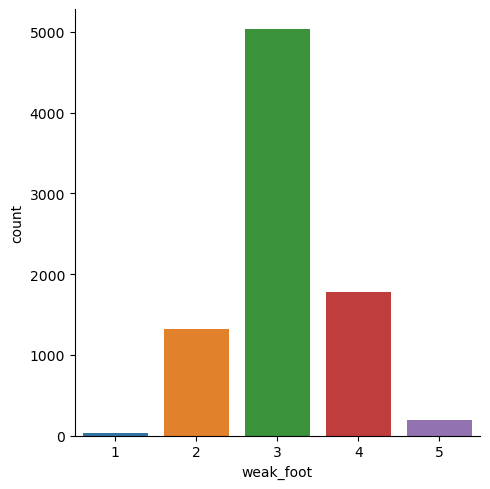

In [184]:
sns.catplot(df, x='weak_foot', kind='count')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


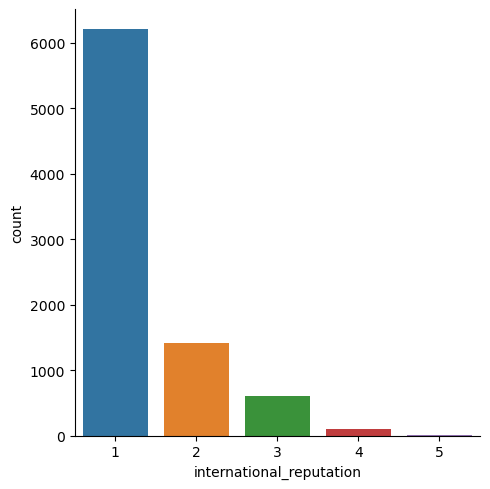

In [185]:
sns.catplot(df, x='international_reputation', kind='count')

In [186]:
n_records = df.shape[0] # number of records in our dataframe

#loop 5 times (1 for each rating from 1-5)
for i in range(5):
    rating = i+1 # index starts from 0 so add 1 to get rating
    
    # get number of records with this rating
    count = df[df['international_reputation']==rating].shape[0]
    percent = count / n_records * 100
    
    print(f"Intl rep rating {rating}: {percent}%") 

Intl rep rating 1: 74.38600694860429%
Intl rep rating 2: 17.024080507966936%
Intl rep rating 3: 7.212172037857913%
Intl rep rating 4: 1.2818976877920212%
Intl rep rating 5: 0.0958428177788427%


c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


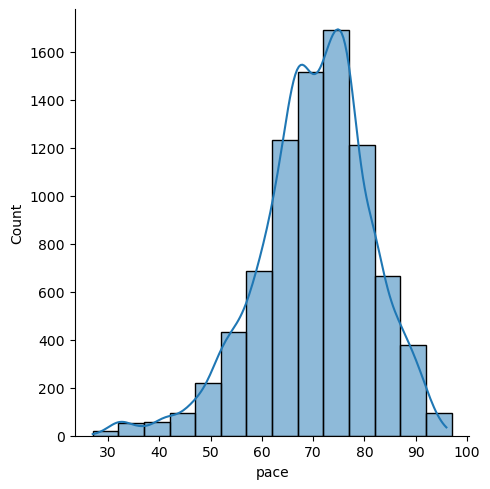

In [187]:
sns.displot(df['pace'], binwidth=5, kde=True)
#sns.boxplot(df, x='pace')

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


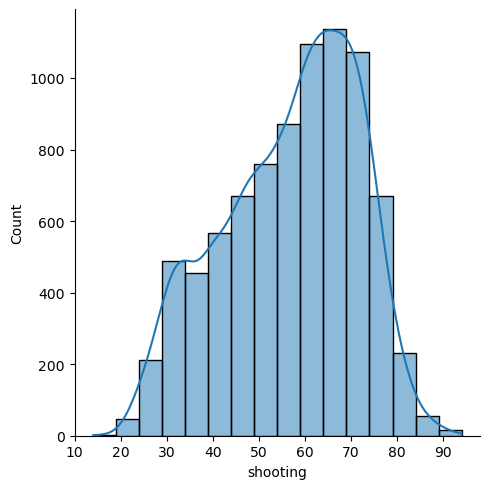

In [188]:
sns.displot(df, x='shooting', binwidth=5, kde=True)

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


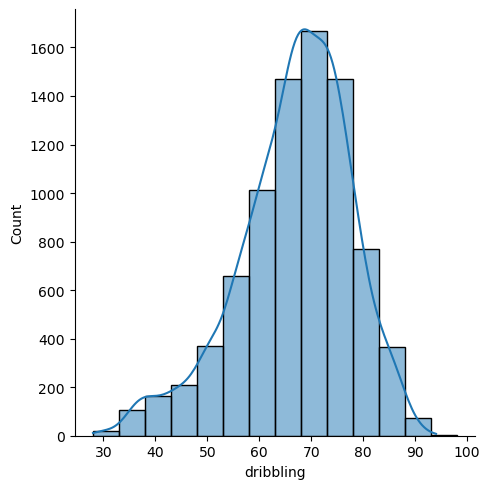

In [189]:
sns.displot(df['dribbling'], binwidth=5, kde=True)

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


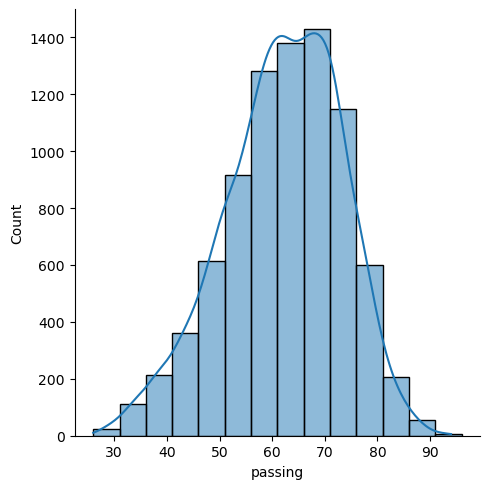

In [190]:
sns.displot(df['passing'], binwidth=5, kde=True)

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


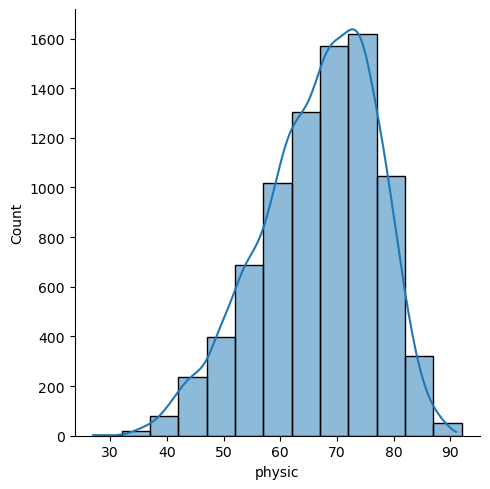

In [191]:
sns.displot(df['physic'], binwidth=5, kde=True)

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


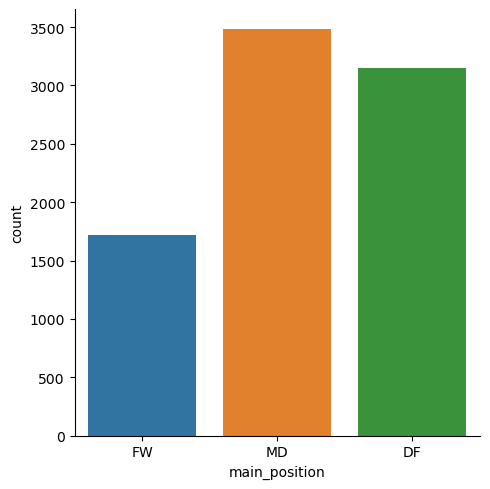

In [192]:
sns.catplot(df, x='main_position', kind='count')

#### Bivariate

c:\Users\Ishina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


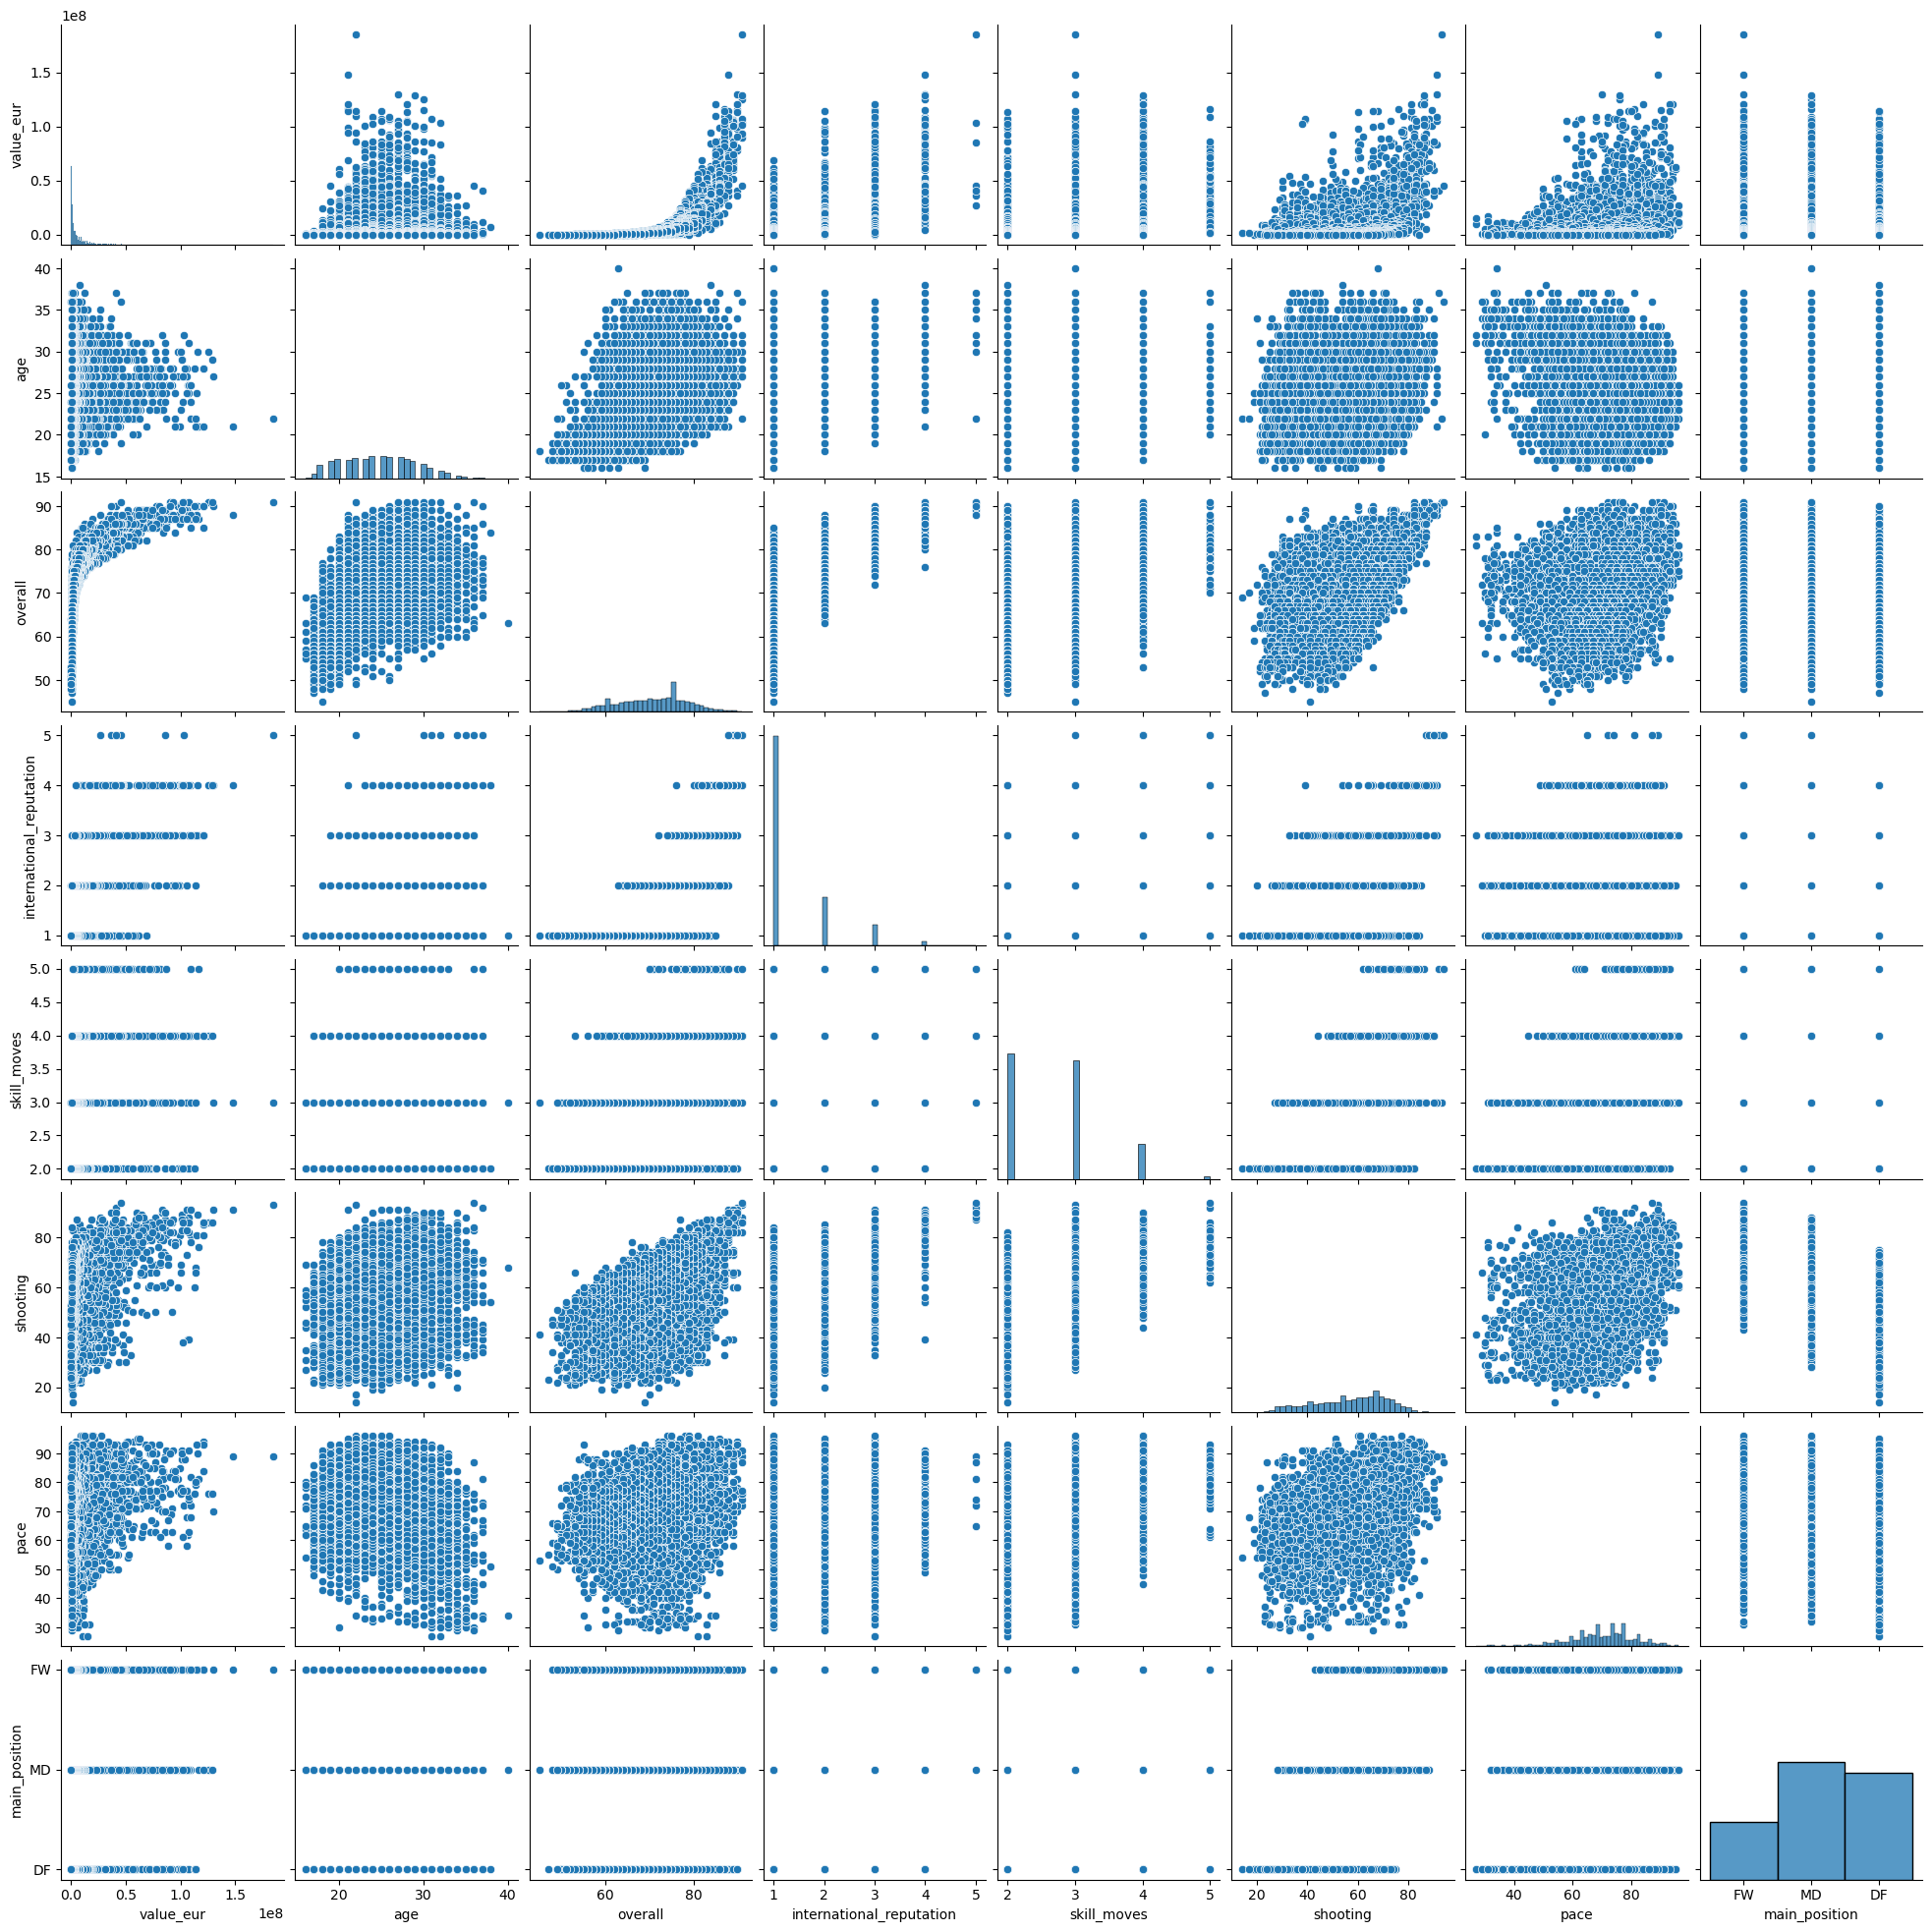

In [193]:
## Pair Plot

sns.pairplot(
    df, 
    vars=[    # 2d grid of these columns
        'value_eur',
        'age',
        'overall',
        'international_reputation',
        'skill_moves',
        'shooting',
        'pace',
        'main_position'
    ], 
)

<Axes: xlabel='fifa_version', ylabel='value_eur'>

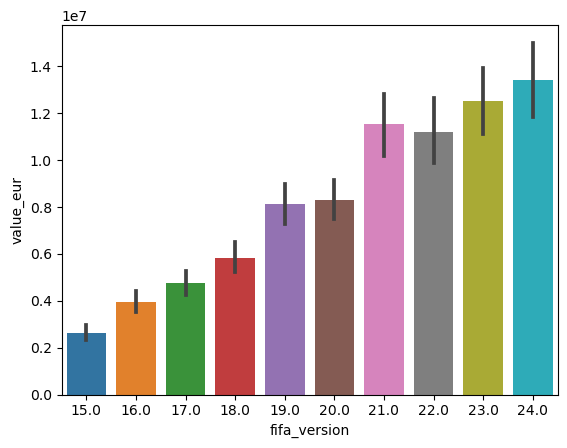

In [194]:
sns.barplot(df, x='fifa_version', y='value_eur')

<Axes: xlabel='age', ylabel='value_eur'>

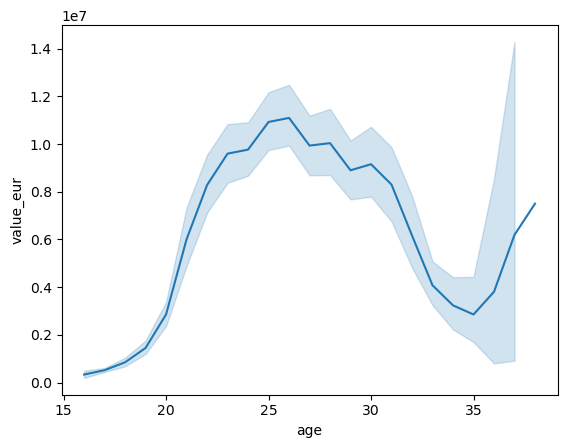

In [195]:
sns.lineplot(df, x='age', y='value_eur')

<Axes: xlabel='overall', ylabel='value_eur'>

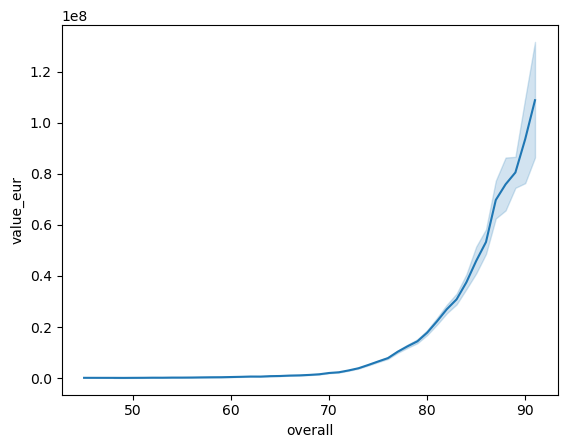

In [196]:
sns.lineplot(df, x='overall', y='value_eur')

<Axes: xlabel='potential', ylabel='value_eur'>

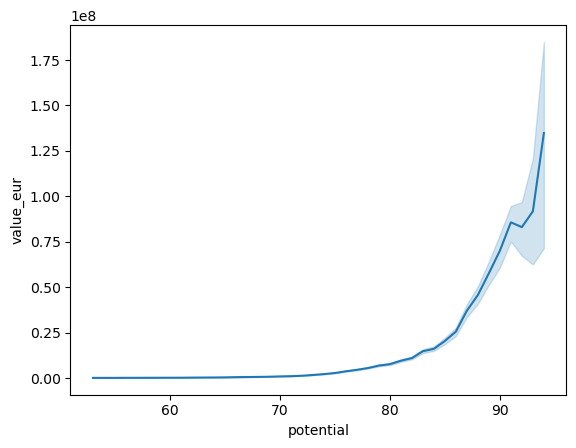

In [197]:
sns.lineplot(df, x='potential', y='value_eur')

<Axes: xlabel='main_position', ylabel='value_eur'>

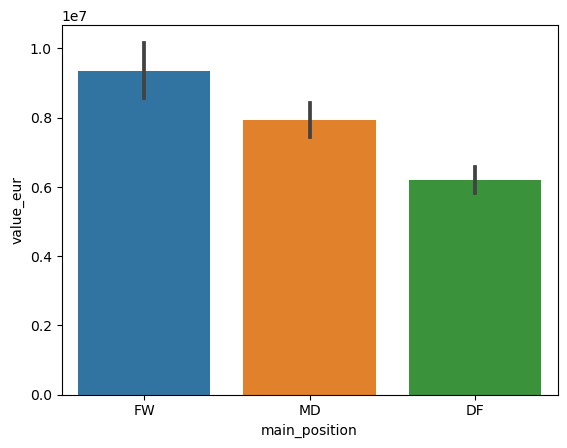

In [198]:
sns.barplot(df, x='main_position', y='value_eur')

<Axes: xlabel='international_reputation', ylabel='value_eur'>

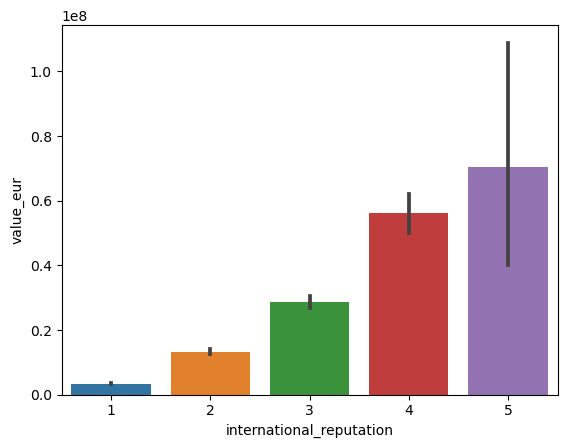

In [199]:
sns.barplot(df, x='international_reputation', y='value_eur')

<Axes: xlabel='preferred_foot', ylabel='value_eur'>

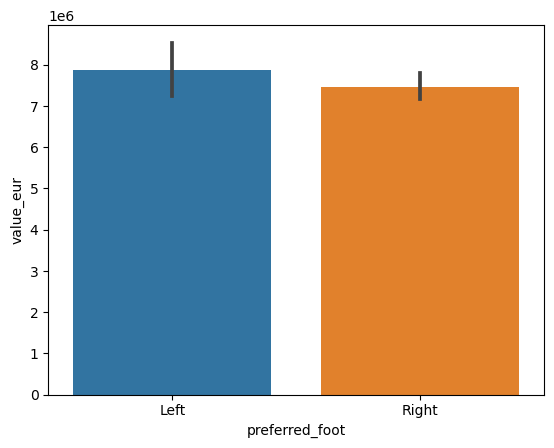

In [200]:
sns.barplot(df, x='preferred_foot', y='value_eur')

<Axes: xlabel='weak_foot', ylabel='value_eur'>

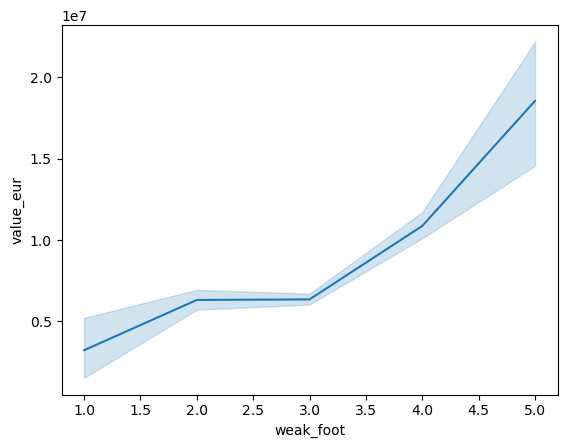

In [201]:
sns.lineplot(df, x='weak_foot', y='value_eur')

<Axes: xlabel='shooting', ylabel='value_eur'>

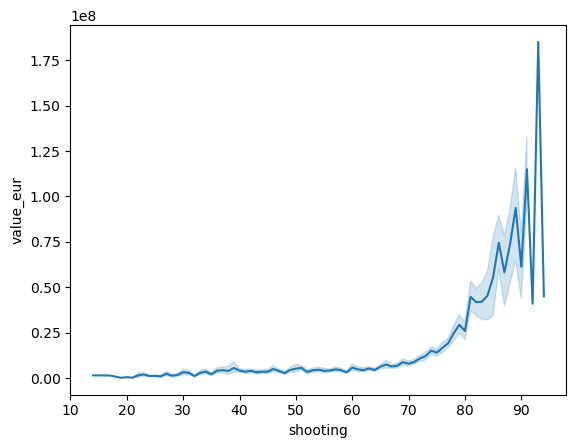

In [202]:
sns.lineplot(df, x='shooting', y='value_eur')

<Axes: xlabel='dribbling', ylabel='value_eur'>

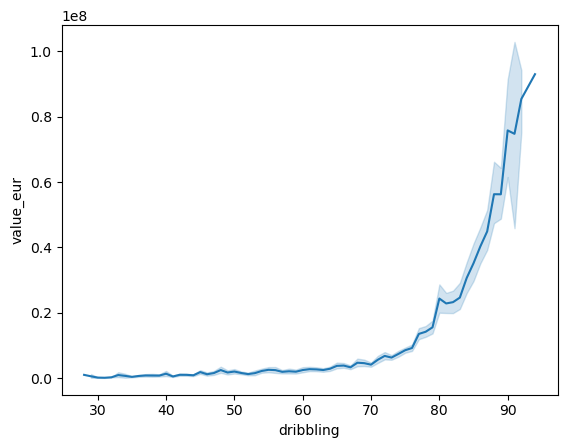

In [203]:
sns.lineplot(df, x='dribbling', y='value_eur')

<Axes: xlabel='passing', ylabel='value_eur'>

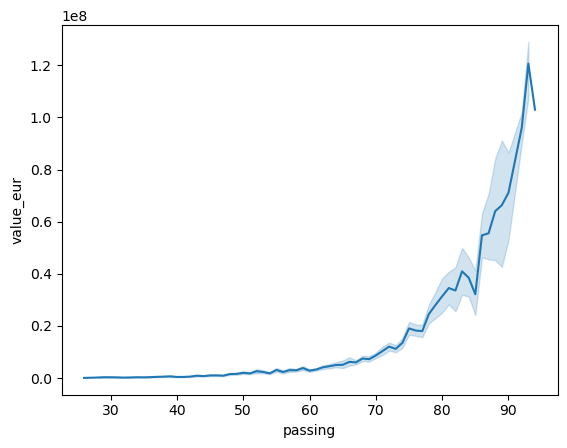

In [204]:
sns.lineplot(df, x='passing', y='value_eur')

<Axes: xlabel='physic', ylabel='value_eur'>

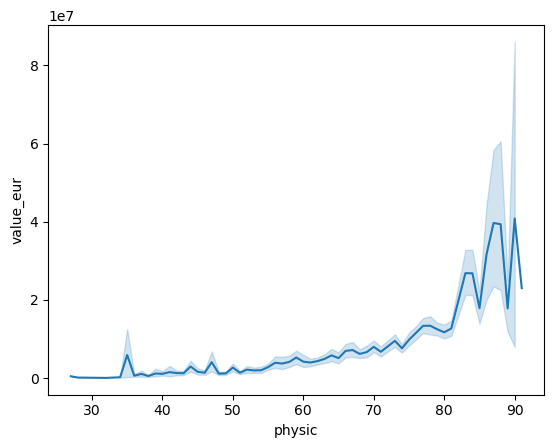

In [205]:
sns.lineplot(df, x='physic', y='value_eur')

<Axes: xlabel='physic', ylabel='overall'>

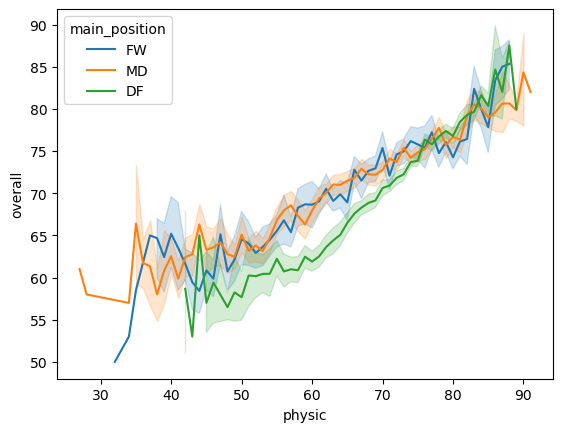

In [206]:
sns.lineplot(df, x='physic', y='overall', hue='main_position')

<Axes: xlabel='fifa_version', ylabel='overall'>

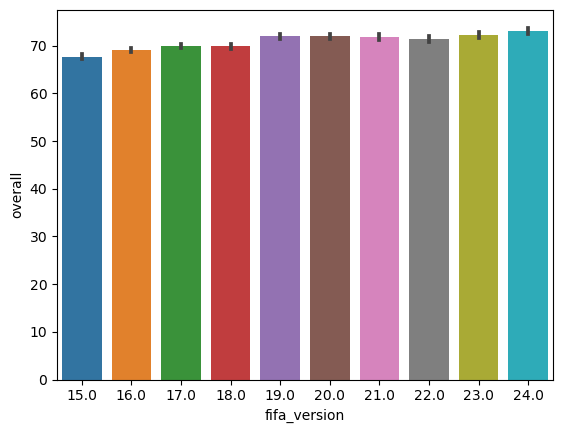

In [207]:
sns.barplot(df, x='fifa_version', y='overall')

# Data cleansing / pre-processing

### Missing data

In [208]:
for col in df.columns:
    n_nulls = df[col].isnull().sum() # get count of column null values
    print(f"{col} - {n_nulls} nulls")

player_id - 0 nulls
fifa_version - 0 nulls
overall - 0 nulls
potential - 0 nulls
value_eur - 12 nulls
age - 0 nulls
nationality_name - 0 nulls
preferred_foot - 0 nulls
weak_foot - 0 nulls
skill_moves - 0 nulls
international_reputation - 0 nulls
work_rate - 0 nulls
pace - 0 nulls
shooting - 0 nulls
passing - 0 nulls
dribbling - 0 nulls
defending - 0 nulls
physic - 0 nulls
main_position - 0 nulls


In [211]:
# Remove rows with null value
df.dropna(subset=['value_eur'], inplace=True)
df['value_eur'].isnull().sum()

C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\3112357543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['value_eur'], inplace=True)


### Data encoding / scaling

Caclulate values adjusted for inflation

In [209]:
# Use this maybe? - https://football-observatory.com/Inflation-in-the-football-players-transfer-market#:~:text=However%2C%20after%20having%20dropped%20sharply,90%25%20without%20considering%20conditional%20payments.

averages = {}

# Loop through each fifa version
for version in df['fifa_version'].unique().tolist():
    # Filter dataframe by version into new var
    _df = df[df['fifa_version']==version]
    # Extract average value using .mean() on column
    avg_value = round(_df['value_eur'].mean())
    # Save average value for version
    averages[version] = avg_value
    print(f'Year 20{version}')
    print('Avg value:', avg_value)


adjusted_value_list = []
adjusted_wage_list = []
# Loop through each row
for i, row in df.iterrows():
    # Get version number
    version = row['fifa_version']
    # Adjust value by calculated inflation ratios
    adjusted_value = row['value_eur'] * (averages[24] / averages[version])
    # Append to list
    adjusted_value_list.append(adjusted_value)
# Create new column from list of adjusted values
df['value_eur_adj'] = adjusted_value_list

Year 2024.0
Avg value: 13389233
Year 2023.0
Avg value: 12518290
Year 2022.0
Avg value: 11191315
Year 2021.0
Avg value: 11518678
Year 2020.0
Avg value: 8305495
Year 2019.0
Avg value: 8111056
Year 2018.0
Avg value: 5831919
Year 2017.0
Avg value: 4742880
Year 2016.0
Avg value: 3949880
Year 2015.0
Avg value: 2636026


C:\Users\Ishina\AppData\Local\Temp\ipykernel_26508\2215821410.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_eur_adj'] = adjusted_value_list


In [210]:
# Use a min max